<a href="https://colab.research.google.com/github/taiyouedax1216-collab/ai-portfolio/blob/main/AI_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# マウントとライブラリの読み込み

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ライブラリのimportを行います
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import platform, sys, numpy, pandas, sklearn, lightgbm, scipy, seaborn, matplotlib, statsmodels
print("Python", sys.version)
print("numpy", numpy.__version__, "pandas", pandas.__version__,
      "sklearn", sklearn.__version__, "lightgbm", lightgbm.__version__,
      "scipy", scipy.__version__, "seaborn", seaborn.__version__,
      "matplotlib", matplotlib.__version__, "statsmodels", statsmodels.__version__)


Python 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
numpy 2.0.2 pandas 2.2.2 sklearn 1.6.1 lightgbm 4.6.0 scipy 1.16.1 seaborn 0.13.2 matplotlib 3.10.0 statsmodels 0.14.5


https://note.nkmk.me/python-package-version/#google_vignette

In [ ]:
!uname -a

Linux a8b771379b0f 6.1.123+ #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025 x86_64 x86_64 x86_64 GNU/Linux


In [ ]:
!cat /etc/os-release

PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


https://wasurenamemo.blogspot.com/2020/09/google-colabosgpu.html#toc_headline_5

# データの読み込みとEDA


In [ ]:
# 自分のドライブにマウントしているとドライブ上のファイルを読み込むことができます。
train = pd.read_csv("sample.train.csv")
test = pd.read_csv("sample.test.csv")

In [ ]:
train.head()

,id,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,Subprogram,InitialInterestRate,FixedOrVariableInterestInd,TermInMonths,NaicsSector,CongressionalDistrict,BusinessType,BusinessAge,RevolverStatus,JobsSupported,CollateralInd,LoanStatus
0,1,23000,7093,2020,FA$TRK (Small Loan Express),11.92,V,84,Accommodation_food services,27,CORPORATION,Unanswered,0,1,N,1
1,2,104300,83477,2020,FA$TRK (Small Loan Express),8.40,V,102,Retail trade,14,CORPORATION,"Startup, Loan Funds will Open Business",1,1,N,1
2,3,163900,53246,2020,Contract Guaranty,4.32,F,119,Construction,0,CORPORATION,Existing or more than 2 years old,1,79,Y,0
3,4,127400,77516,2021,Guaranty,6.40,F,59,Information,3,CORPORATION,Existing or more than 2 years old,0,2,N,0
4,5,2128900,858942,2020,Guaranty,5.21,V,300,Health care_social assistance,44,CORPORATION,New Business or 2 years or less,0,5,Y,0


In [ ]:
train.describe()

,id,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,CongressionalDistrict,RevolverStatus,JobsSupported,LoanStatus
count,7552.000000,7.552000e+03,7.552000e+03,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000,7552.000000
mean,3776.500000,7.219039e+05,4.536842e+05,2021.091499,7.379586,119.854211,12.681674,0.115731,14.281912,0.127648
std,2180.218949,1.112669e+06,7.805103e+05,1.125885,2.884902,82.423821,12.307653,0.319923,27.635214,0.333720
min,1.000000,5.000000e+03,2.500000e+03,2020.000000,1.030000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1888.750000,5.110000e+04,2.653525e+04,2020.000000,5.120000,60.000000,3.000000,0.000000,1.000000,0.000000
50%,3776.500000,1.896000e+05,1.063350e+05,2021.000000,6.610000,119.000000,7.000000,0.000000,5.000000,0.000000
75%,5664.250000,8.113000e+05,4.669272e+05,2022.000000,9.550000,120.000000,22.000000,0.000000,14.000000,0.000000
max,7552.000000,4.995000e+06,4.311817e+06,2024.000000,15.000000,306.000000,52.000000,1.000000,236.000000,1.000000


借入者の雇用数

In [ ]:
train[train['JobsSupported']==0]

,id,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,Subprogram,InitialInterestRate,FixedOrVariableInterestInd,TermInMonths,NaicsSector,CongressionalDistrict,BusinessType,BusinessAge,RevolverStatus,JobsSupported,CollateralInd,LoanStatus
8,9,162900,70043,2021,FA$TRK (Small Loan Express),4.49,F,156,Agriculture_forestry_fishing_hunting,6,CORPORATION,New Business or 2 years or less,0,0,Y,0
30,31,1462100,261153,2022,Guaranty,12.22,V,119,Construction,26,CORPORATION,Existing or more than 2 years old,0,0,N,0
33,34,22200,10132,2020,FA$TRK (Small Loan Express),6.34,F,59,Construction,0,INDIVIDUAL,Unanswered,0,0,N,0
38,39,142200,84590,2020,Guaranty,6.02,V,90,Manufacturing,8,CORPORATION,"Startup, Loan Funds will Open Business",0,0,Y,1
49,50,159800,34999,2023,FA$TRK (Small Loan Express),14.95,V,7,Professional_scientific_technical services,7,CORPORATION,Existing or more than 2 years old,0,0,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7529,7530,45500,14142,2022,FA$TRK (Small Loan Express),9.32,V,95,Other services (except public administration),20,CORPORATION,New Business or 2 years or less,0,0,N,0
7532,7533,168500,78704,2022,Guaranty,13.37,V,85,Retail trade,4,CORPORATION,"Startup, Loan Funds will Open Business",0,0,N,0
7534,7535,19600,12738,2022,FA$TRK (Small Loan Express),9.04,V,106,Professional_scientific_technical services,28,CORPORATION,New Business or 2 years or less,0,0,N,0
7536,7537,174700,32554,2020,FA$TRK (Small Loan Express),5.09,V,302,Transportation_warehousing,1,CORPORATION,New Business or 2 years or less,0,0,Y,0


In [ ]:
test.head(10)

,id,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,Subprogram,InitialInterestRate,FixedOrVariableInterestInd,TermInMonths,NaicsSector,CongressionalDistrict,BusinessType,BusinessAge,RevolverStatus,JobsSupported,CollateralInd
0,7553,22900,10607,2021,FA$TRK (Small Loan Express),4.30,F,5,Arts_entertainment_recreation,24,CORPORATION,Existing or more than 2 years old,0,10,Y
1,7554,29000,13390,2020,FA$TRK (Small Loan Express),6.97,V,120,Wholesale trade,5,INDIVIDUAL,New Business or 2 years or less,0,0,Y
2,7555,2913000,1737254,2020,Guaranty,5.61,V,200,Manufacturing,1,CORPORATION,"Startup, Loan Funds will Open Business",0,96,Y
3,7556,39200,24755,2022,FA$TRK (Small Loan Express),10.00,V,85,Other services (except public administration),11,CORPORATION,Unanswered,1,12,N
4,7557,13600,5064,2020,FA$TRK (Small Loan Express),7.34,V,39,Other services (except public administration),1,CORPORATION,Existing or more than 2 years old,0,0,N
5,7558,43000,16586,2020,FA$TRK (Small Loan Express),7.23,V,83,Professional_scientific_technical services,3,CORPORATION,Unanswered,0,5,Y
6,7559,2498300,2189804,2020,Guaranty,3.86,V,187,Manufacturing,6,CORPORATION,"Startup, Loan Funds will Open Business",0,44,Y
7,7560,42300,13926,2022,FA$TRK (Small Loan Express),9.01,V,190,Accommodation_food services,13,CORPORATION,Existing or more than 2 years old,0,13,N
8,7561,212600,208306,2020,Guaranty,5.95,F,83,Agriculture_forestry_fishing_hunting,3,INDIVIDUAL,New Business or 2 years or less,0,2,Y
9,7562,29700,19796,2020,FA$TRK (Small Loan Express),7.16,V,120,Retail trade,24,CORPORATION,New Business or 2 years or less,0,14,Y


このデータには特徴量として以下の要素が確認できます。

- id: データID
- GrossApproval: 融資承認額（総額）
- SBAGuaranteedApproval: 融資額の補償金額
- ApprovalFiscalYear: 融資承認年度
- Subprogram: ローンの種類
- InitialInterestRate: 初期金利
- FixedOrVariableInterestInd: 固定金利(F)または変動金利(V)
- TermInMonths: 融資期間（月単位）
- NaicsSector: 産業の大分類
- CongressionalDistrict: 借入者の住所が属する選挙区
- CORPORATION: 借入者の事業形態
- BusinessAge: 事業の年数区分
- RevolverStatus: 定期貸付（0）かリボルビング（1）か
- JobsSupported: 借入者事業者の雇用数（借入者の自己申告）
- CollateralInd: 担保の有無（借入者の自己申告）
- LoanStatus: ローンの状態(目的変数: 1 = デフォルト, 0 = デフォルトしていない)


本コンペティションではtestデータの債務不履行の有無(LoanStatus)を正確に予測する必要があります。

このため予測対象であるtestデータにはLoanStatusがありません。

In [ ]:
train['Subprogram'].unique()

array(['FA$TRK (Small Loan Express)', 'Contract Guaranty', 'Guaranty',
       'Community Advantage Initiative', 'Standard Asset Based',
       'Seasonal Line of Credit', 'International Trade - Sec, 7(a) (16)',
       'Revolving Line of Credit Exports - Sec. 7(a) (14)',
       'Small General Contractors - Sec. 7(a) (9)'], dtype=object)

表記ゆれがあるかも

In [ ]:
train.groupby('Subprogram')['GrossApproval'].mean().sort_values(ascending=False)

,GrossApproval
Subprogram,
Revolving Line of Credit Exports - Sec. 7(a) (14),1.580445e+06
Small General Contractors - Sec. 7(a) (9),1.306888e+06
Guaranty,1.273921e+06
Standard Asset Based,1.028224e+06
Contract Guaranty,7.859719e+05
"International Trade - Sec, 7(a) (16)",7.126603e+05
Seasonal Line of Credit,5.870269e+05
Community Advantage Initiative,2.628395e+05
FA$TRK (Small Loan Express),1.864381e+05


In [ ]:
train.groupby('Subprogram')['LoanStatus'].count().sort_values(ascending=False)

,LoanStatus
Subprogram,
FA$TRK (Small Loan Express),3471
Guaranty,3282
Community Advantage Initiative,261
Revolving Line of Credit Exports - Sec. 7(a) (14),135
Standard Asset Based,123
Contract Guaranty,121
"International Trade - Sec, 7(a) (16)",116
Seasonal Line of Credit,26
Small General Contractors - Sec. 7(a) (9),17


ローンの種類によって結構違う

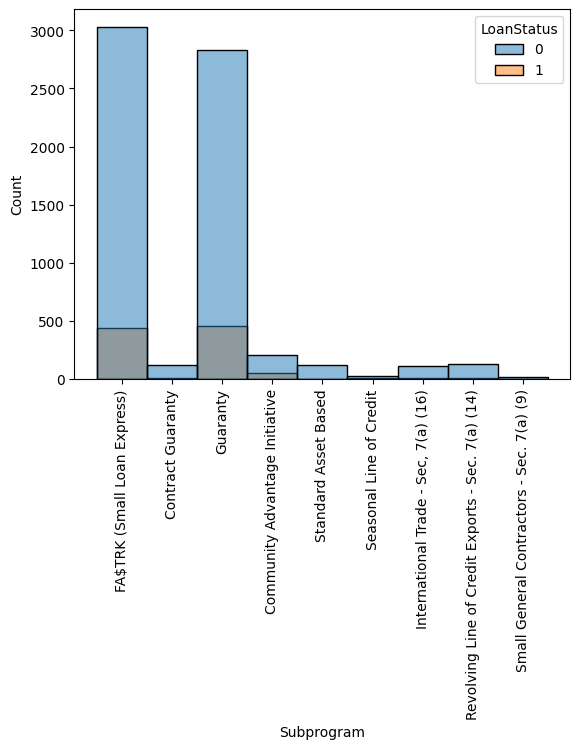

In [ ]:
sns.histplot(x='Subprogram',hue='LoanStatus',data=train)
plt.xticks(rotation=90)
plt.show()

In [ ]:
train.groupby('Subprogram')['GrossApproval'].mean().sort_values(ascending=False)

,GrossApproval
Subprogram,
Revolving Line of Credit Exports - Sec. 7(a) (14),1.580445e+06
Small General Contractors - Sec. 7(a) (9),1.306888e+06
Guaranty,1.273921e+06
Standard Asset Based,1.028224e+06
Contract Guaranty,7.859719e+05
"International Trade - Sec, 7(a) (16)",7.126603e+05
Seasonal Line of Credit,5.870269e+05
Community Advantage Initiative,2.628395e+05
FA$TRK (Small Loan Express),1.864381e+05


In [ ]:
train.groupby('ApprovalFiscalYear')['LoanStatus'].mean().sort_values(ascending=False)

,LoanStatus
ApprovalFiscalYear,
2021,0.157030
2022,0.145563
2023,0.123926
2020,0.107387
2024,0.062069


年によって額が違う、またデフォルトも違う

In [ ]:
train.groupby('ApprovalFiscalYear')['GrossApproval'].mean().sort_values(ascending=False)

,GrossApproval
ApprovalFiscalYear,
2020,985779.795158
2021,680815.703022
2022,469038.528139
2023,421403.190184
2024,201432.413793


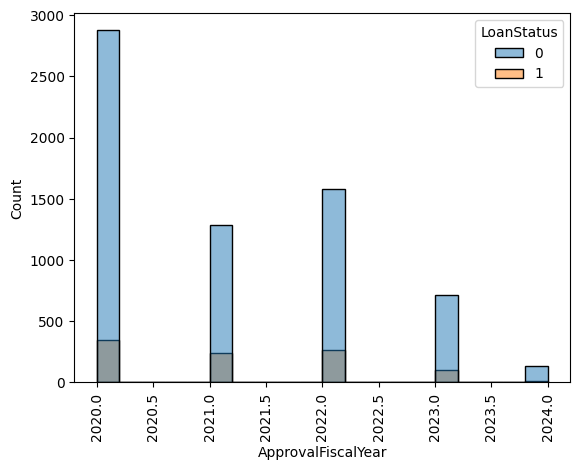

In [ ]:
sns.histplot(x='ApprovalFiscalYear',hue='LoanStatus',data=train)
plt.xticks(rotation=90)
plt.show()

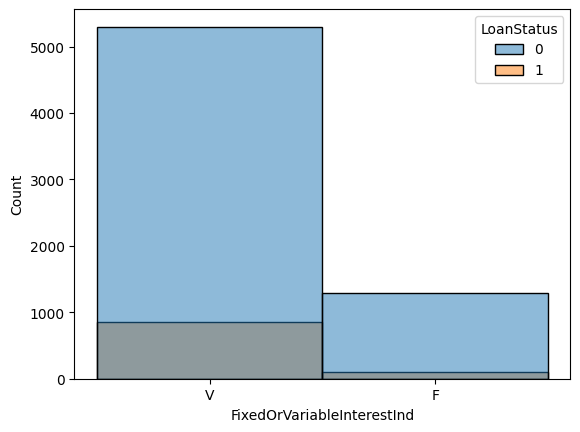

In [ ]:
sns.histplot(x='FixedOrVariableInterestInd',hue='LoanStatus',data=train)
plt.show()

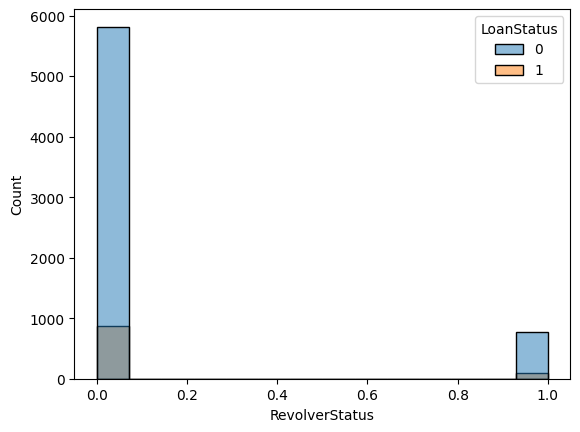

In [ ]:
sns.histplot(x='RevolverStatus',hue='LoanStatus',data=train)
plt.show()

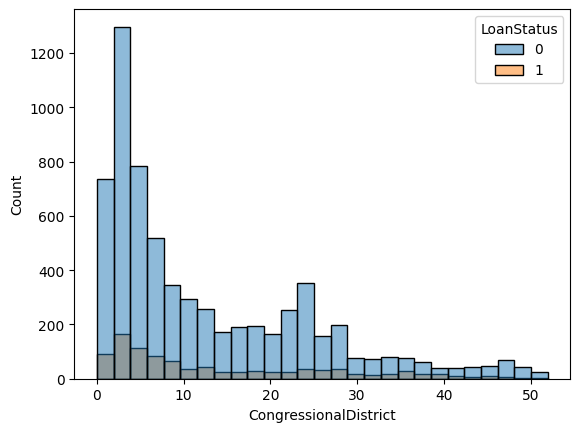

In [ ]:
sns.histplot(x='CongressionalDistrict',hue='LoanStatus',data=train)
plt.show()

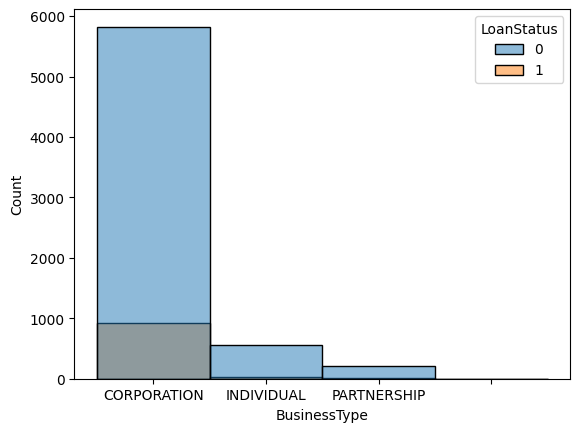

In [ ]:
sns.histplot(x='BusinessType',hue='LoanStatus',data=train)
plt.show()

企業がデフォルトしやすい

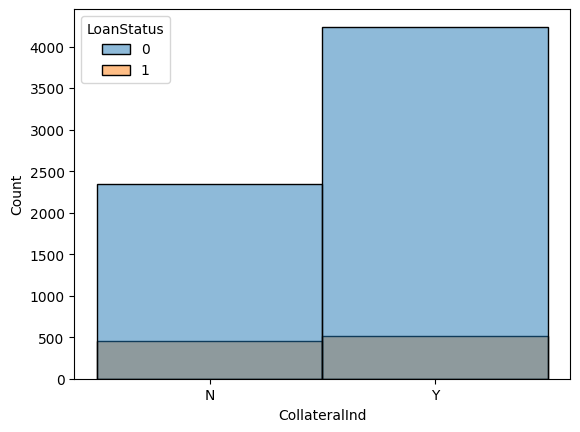

In [ ]:
sns.histplot(x='CollateralInd',hue='LoanStatus',data=train)
plt.show()

担保の有無（借入者の自己申告）

担保がない方がデフォルト率が高そう

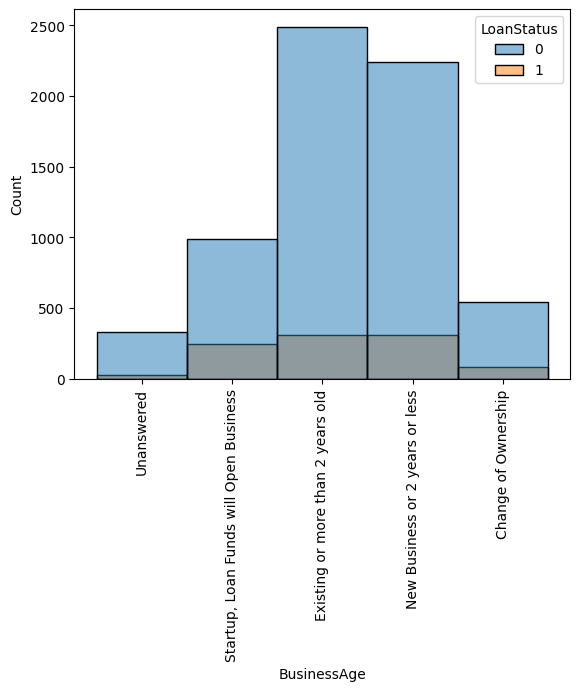

In [ ]:
sns.histplot(x='BusinessAge',hue='LoanStatus',data=train)
plt.xticks(rotation=90)
plt.show()

短いと少しデフォルトしやすい

**ヒートマップ**

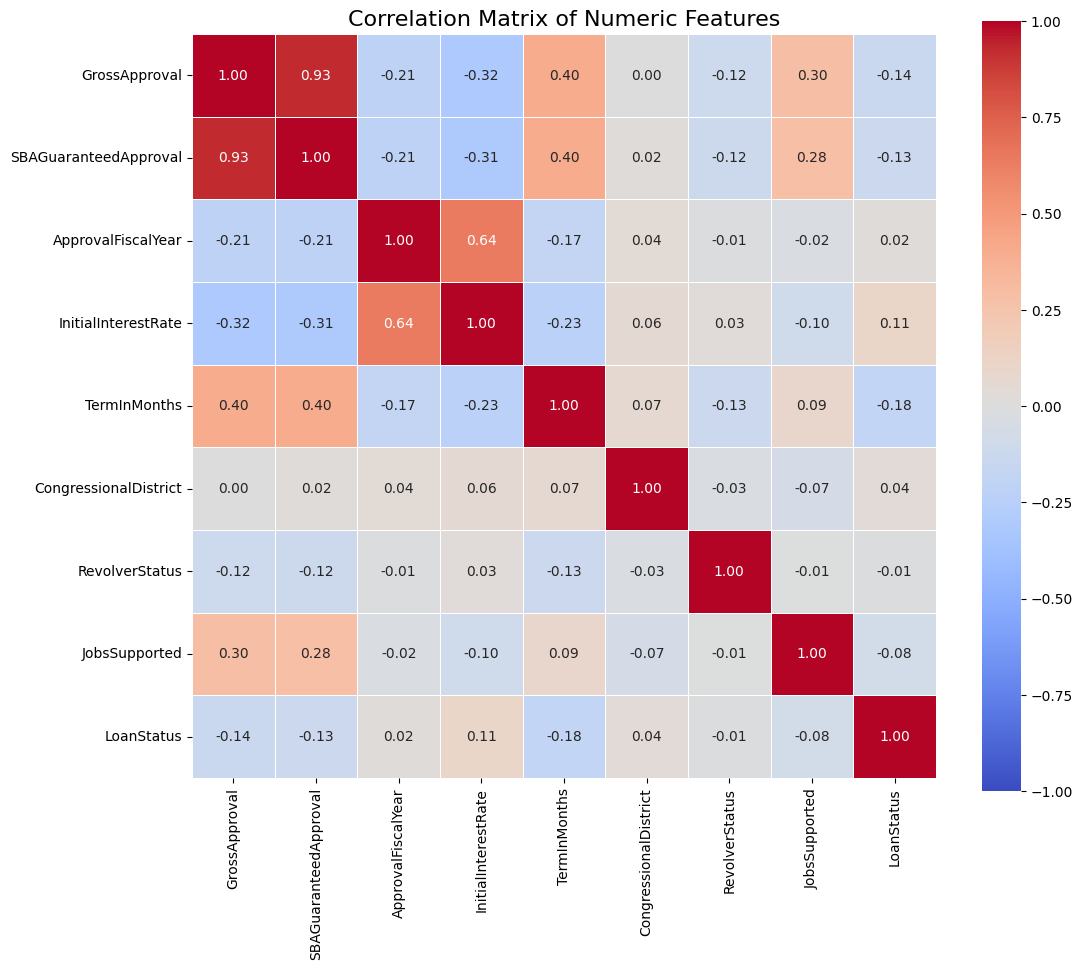

In [ ]:
# 数値列だけを取り出す（Id, Drafted列は除く）
numeric_cols = train.select_dtypes(include=['number']).drop(columns=['id']) # Remove 'id' from columns to drop

# 相関行列を計算
corr_matrix = numeric_cols.corr()

# ヒートマップをプロット
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5
)

plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

In [ ]:
print(train.shape)
print(test.shape)

(7552, 16)
(7552, 15)


欠損値の確認

In [ ]:
train.isnull().sum().sort_values(ascending=False)

,0
id,0
GrossApproval,0
SBAGuaranteedApproval,0
ApprovalFiscalYear,0
Subprogram,0
InitialInterestRate,0
FixedOrVariableInterestInd,0
TermInMonths,0
NaicsSector,0
CongressionalDistrict,0


In [ ]:
test.isnull().sum().sort_values(ascending=False)

,0
id,0
GrossApproval,0
SBAGuaranteedApproval,0
ApprovalFiscalYear,0
Subprogram,0
InitialInterestRate,0
FixedOrVariableInterestInd,0
TermInMonths,0
NaicsSector,0
CongressionalDistrict,0


In [ ]:
train.head(3)

,id,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,Subprogram,InitialInterestRate,FixedOrVariableInterestInd,TermInMonths,NaicsSector,CongressionalDistrict,BusinessType,BusinessAge,RevolverStatus,JobsSupported,CollateralInd,LoanStatus
0,1,23000,7093,2020,FA$TRK (Small Loan Express),11.92,V,84,Accommodation_food services,27,CORPORATION,Unanswered,0,1,N,1
1,2,104300,83477,2020,FA$TRK (Small Loan Express),8.40,V,102,Retail trade,14,CORPORATION,"Startup, Loan Funds will Open Business",1,1,N,1
2,3,163900,53246,2020,Contract Guaranty,4.32,F,119,Construction,0,CORPORATION,Existing or more than 2 years old,1,79,Y,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7552 entries, 0 to 7551
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          7552 non-null   int64  
 1   GrossApproval               7552 non-null   int64  
 2   SBAGuaranteedApproval       7552 non-null   int64  
 3   ApprovalFiscalYear          7552 non-null   int64  
 4   Subprogram                  7552 non-null   object 
 5   InitialInterestRate         7552 non-null   float64
 6   FixedOrVariableInterestInd  7552 non-null   object 
 7   TermInMonths                7552 non-null   int64  
 8   NaicsSector                 7552 non-null   object 
 9   CongressionalDistrict       7552 non-null   int64  
 10  BusinessType                7552 non-null   object 
 11  BusinessAge                 7552 non-null   object 
 12  RevolverStatus              7552 non-null   int64  
 13  JobsSupported               7552 

In [ ]:
train['BusinessAge'].unique()

array(['Unanswered', 'Startup, Loan Funds will Open Business',
       'Existing or more than 2 years old',
       'New Business or 2 years or less', 'Change of Ownership'],
      dtype=object)

In [ ]:
train["LoanStatus"].value_counts(normalize=True)

,proportion
LoanStatus,
0,0.872352
1,0.127648


デフォルトしていない方が全体の約87%あり、0の方が多いことがわかりました。

では次はこれをグラフ化してみましょう。

2つのデータの大小を比較するので、棒グラフで比較します。

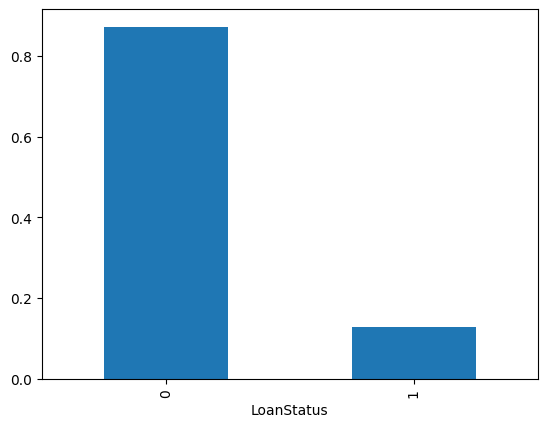

In [ ]:
LoanStatus_value_count = train["LoanStatus"].value_counts(normalize=True)
LoanStatus_value_count.plot.bar()
plt.show()

先ほどの結果通り、デフォルトしていない0のデータが多いことがわかりました。

出現数を単に比較したい場合は、上記のコードで確認したい特徴量を変えると別の特徴量でも比較ができます。

それでは次に他の特徴量の関係性について確認してみましょう。

与えられた特徴量でデフォルト率に関係がありそうなものは色々ありますが、わかりやすそうな、`NaicsSector(産業の大分類)`、`TermInMonths(融資期間)`、`GrossApproval(融資の総額)`を確認してみましょう。

`NaicsSector(産業の大分類)`はカテゴリデータ、

`TermInMonths(融資期間)`、`GrossApproval(融資の総額)`は数値データ、

です。

それぞれどのように傾向をグラフ化するのか確認してみましょう。

**NaicsSectorとLoanStatusの関係**

まずNaicsSector(産業の大分類)を見ていきましょう。

大分類を確認するとカテゴリデータのため、カテゴリごとにデフォルト率を算出すれば、傾向が見えてきそうです。

In [ ]:
train["NaicsSector"].head()

,NaicsSector
0,Accommodation_food services
1,Retail trade
2,Construction
3,Information
4,Health care_social assistance


それぞれのカテゴリごとに一つ一つデフォルト率を算出する方法もありますが、それは面倒なので、`groupby`で一括して行う方法を取ります。

`groupby`は集計のコードで、excelで例えると、ピボットテーブルに近い機能を持ちます。

以下のコードで実行できます。

In [ ]:
train.groupby("NaicsSector")["LoanStatus"].mean()

,LoanStatus
NaicsSector,
Accommodation_food services,0.124413
Administrative_support_waste management_remediation services,0.145098
Agriculture_forestry_fishing_hunting,0.025478
Arts_entertainment_recreation,0.157895
Construction,0.147993
Educational services,0.051852
Finance_insurance,0.028436
Health care_social assistance,0.142857
Information,0.042553


確認できましたが、データ量が多いので、グラフ化して一気に比較してみましょう!

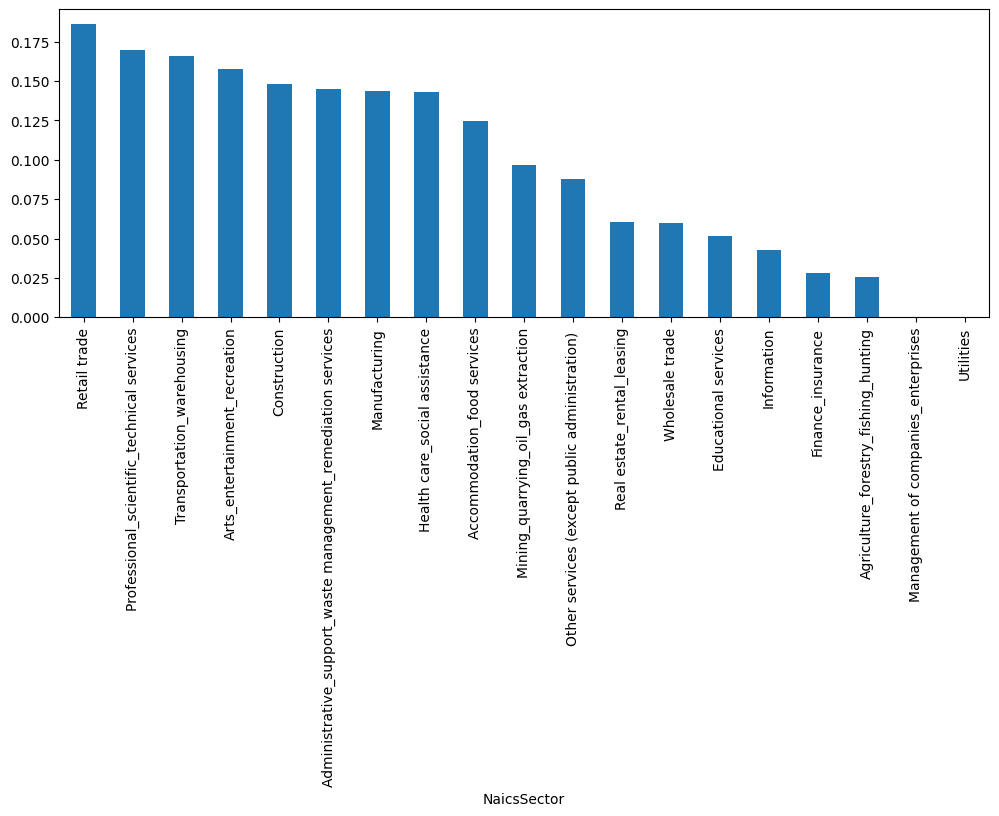

In [ ]:
# 確認する量が多いのでグラフを大きくして可視化しています
plt.figure(figsize=(12, 4))
train.groupby("NaicsSector")["LoanStatus"].mean().sort_values(ascending=False).plot.bar()
plt.show()

最もデフォルト率が高かったのは、Reatil Trade(小売業)でした!

全体のデフォルトの確率が約12.7%程度だったのに対し、小売業は約17.5%と、周りと比べても5%程デフォルト率が高いですね!

また一方で、デフォルト率が0%のデータも存在します。

こちらは本当に0%なのか、データが少なくて偶然0%になっている可能性もあります。

実際に確認してみましょう。

In [ ]:
print(train[train["NaicsSector"] == "Management of companies_enterprises"].shape)

(9, 16)


In [ ]:
print(train[train["NaicsSector"] == "Utilities"].shape)

(30, 16)


どちらもサンプル数としては少なめですね。

こういったサンプル数の少ないデータは例外として扱う方法もあります。

ですがこのチュートリアルでは、例外として扱かわずこのまま利用します。

もしこの扱いが気になる場合は、チュートリアル後の次の段階として例外として扱う方法も考えてみましょう。

例えば、要素数が50以下のカテゴリは、"Other"として扱うなどが考えられます。

`vc_dict = train["NaicsSector"].value_counts().to_dict()`<br>
`train.loc[train["NaicsSector"].map(vc_dict) <= 50, "NaicsSector"] = "Other"`

"**NaicsSectorごとのGrossApproval**

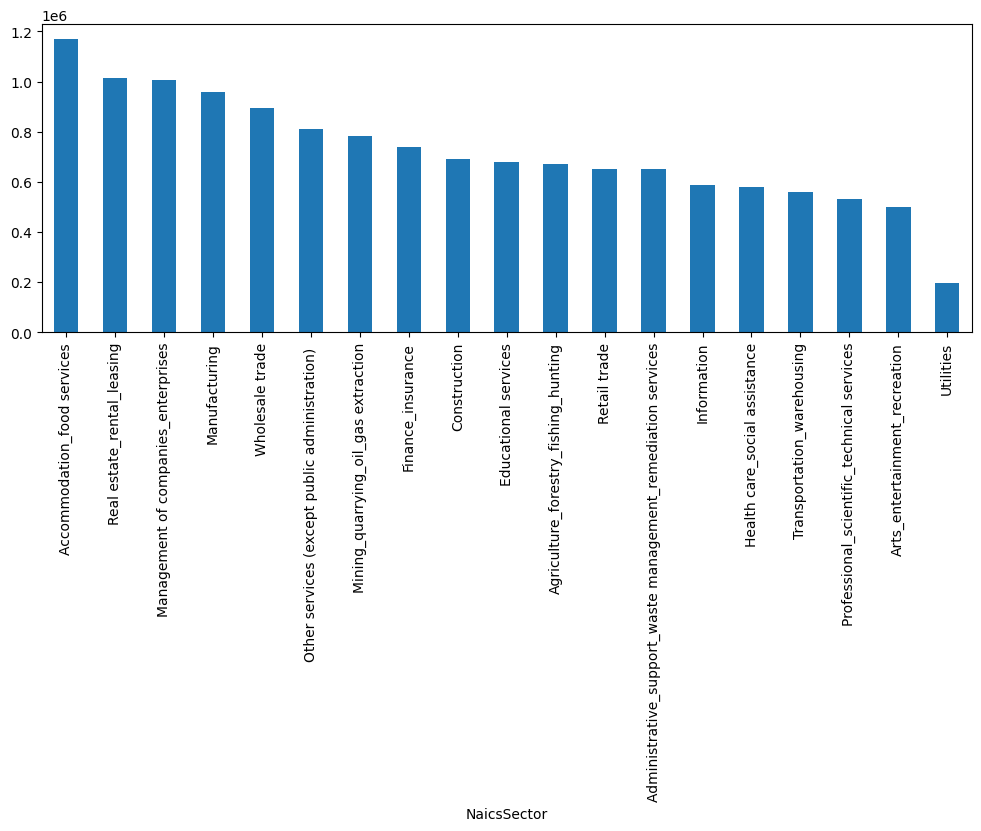

In [ ]:
# 確認する量が多いのでグラフを大きくして可視化しています
plt.figure(figsize=(12, 4))
train.groupby("NaicsSector")['GrossApproval'].mean().sort_values(ascending=False).plot.bar()
plt.show()

**DisbursementGrossとLoanStatusの関係**

では次に期間や総額などの数値データとの関係性を見ていきましょう。

カテゴリとは別の方法で見ていきます。

In [ ]:
# データの値を確認しています
train[["TermInMonths", "GrossApproval"]].head()

,TermInMonths,GrossApproval
0,84,23000
1,102,104300
2,119,163900
3,59,127400
4,300,2128900


まず数値データについては、全体の分布を確認していましょう。

ヒストグラムでも良いですが、ここは`describe()`を使って大まかな統計量を確認します。

In [ ]:
train[["TermInMonths", "GrossApproval"]].describe()

,TermInMonths,GrossApproval
count,7552.000000,7.552000e+03
mean,119.854211,7.219039e+05
std,82.423821,1.112669e+06
min,3.000000,5.000000e+03
25%,60.000000,5.110000e+04
50%,119.000000,1.896000e+05
75%,120.000000,8.113000e+05
max,306.000000,4.995000e+06


GrossApprovalは全体的に値が大きいことがわかりました。


まずデフォルトするかしないかで、TermInMonthsとGrossApprovalの値に変動があるかどうかを確認してみましょう。

In [ ]:
train.groupby("LoanStatus")["TermInMonths"].mean()

,TermInMonths
LoanStatus,
0,125.623406
1,80.427386


In [ ]:
train.groupby("LoanStatus")["GrossApproval"].mean()

,GrossApproval
LoanStatus,
0,780791.469338
1,319465.041494


基本的にデフォルトする方が、値が小さくなる傾向にありそうです。(つまり期間が短いほど、融資の総額が小さいほどデフォルトしやすくなります)

ですが最大値と最小値の値の差が非常に大きく、その影響もあると思いますので、他の視点でも確認してみましょう。

他の視点として相関係数を見て確認していきます。

相関係数は、データの関係性を確認できる方法です。一般的に連続する数値同士の関係性を見るのに使います。

今回の場合、デフォルトするかしないかを0と1で表現しているデータと比較します。

一見すると関係性の確認がしにくいように見えますが、多少の傾向であれば相関係数で確認ができますので実際に見てみましょう。

In [ ]:
# corr()で相関係数を見ることができます。
train[["TermInMonths", "GrossApproval", "LoanStatus"]].corr()

,TermInMonths,GrossApproval,LoanStatus
TermInMonths,1.000000,0.402922,-0.182991
GrossApproval,0.402922,1.000000,-0.138364
LoanStatus,-0.182991,-0.138364,1.000000


LoanStatusとTermInMonthsは-0.18、GrossApprovalは-0.14とどちらも負の相関、つまり、値が小さければ、デフォルトしやすくなる傾向があると言えそうです。

それを確認するために、最後にデフォルトする時としない時でのデータの出現率の違いを確認してみましょう!

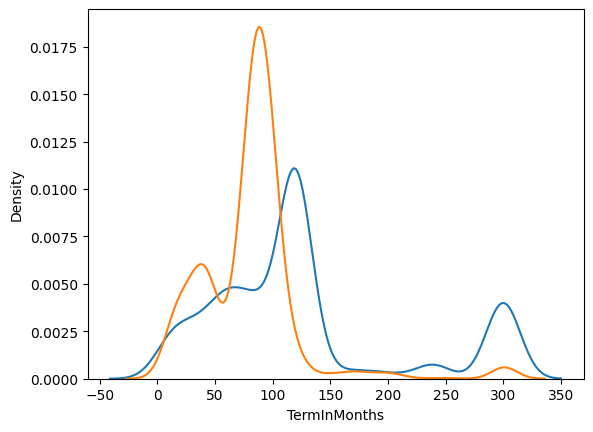

In [ ]:
# kdeplotでデータの出現率の分布を確認できます。
sns.kdeplot(train[train["LoanStatus"] == 0]["TermInMonths"])
sns.kdeplot(train[train["LoanStatus"] == 1]["TermInMonths"])
plt.show()

上記分布は、データの出現率を表しているグラフで、上に行くほど出現率が高い傾向を表します。

(青がデフォルトしない時の分布、オレンジがデフォルトする時の分布です。)

この結果を見ると、TermInMonthsについては、短い方がデフォルトする確率が高いと言えそうです。

同様にGrossApprovalも見てみましょう!

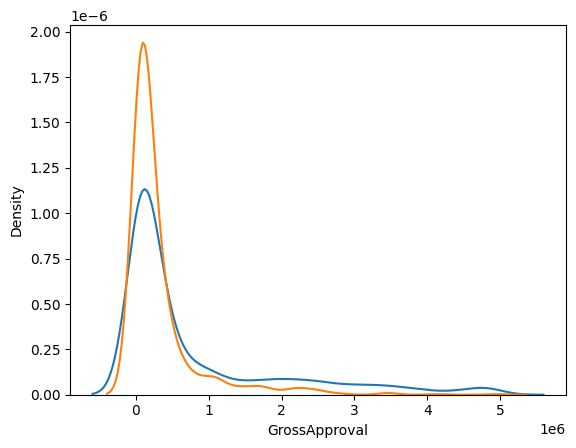

In [ ]:
sns.kdeplot(train[train["LoanStatus"] == 0]["GrossApproval"])
sns.kdeplot(train[train["LoanStatus"] == 1]["GrossApproval"])
plt.show()

相関係数の通り、GrossApprovalが小さい方がデフォルトする可能性が高いと言えそうです。

チュートリアルの可視化はここまでですが、上記の特徴量以外にもさまざまな特徴量が存在します。

チュートリアルが終わり次第、仮説を立てて他の特徴量とデフォルト率との関係を可視化してみましょう。

このチュートリアルのグラフ化だけでも一定確認できますが、他にも様々なグラフが用意されていますので、興味がありましたら新たな可視化も試してみましょう!

<Axes: xlabel='SBAGuaranteedApproval', ylabel='Count'>

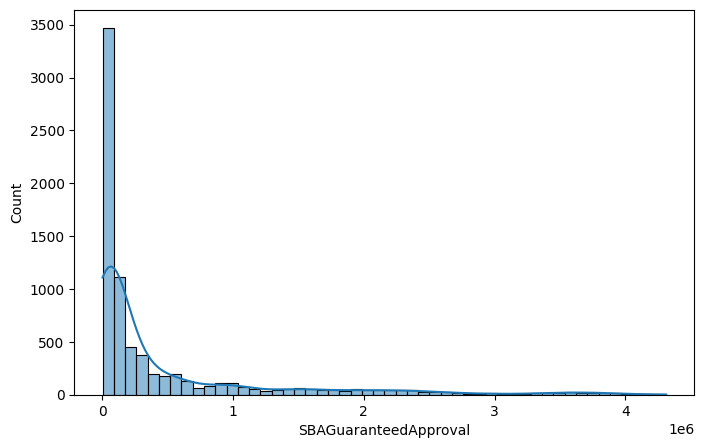

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(train['SBAGuaranteedApproval'], bins=50, kde=True)  # binを多めにして密度曲線も追加



<Axes: xlabel='SBAGuaranteedApproval', ylabel='Count'>

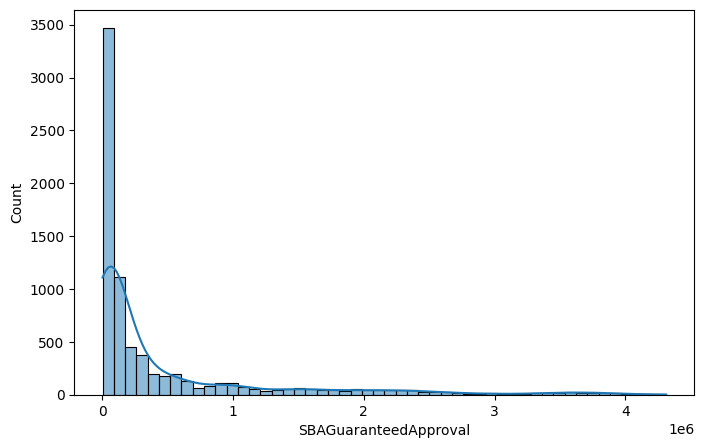

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(train['SBAGuaranteedApproval'], bins=50, kde=True)  # binを多めにして密度曲線も追加



<Axes: xlabel='JobsSupported', ylabel='Count'>

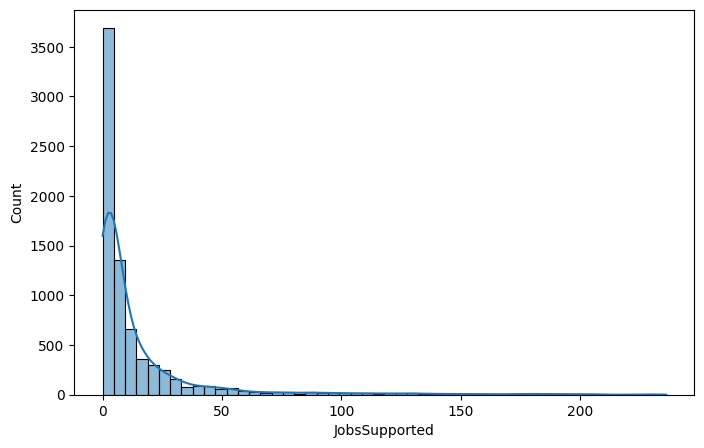

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(train['JobsSupported'], bins=50, kde=True)  # binを多めにして密度曲線も追加



                       skewness
JobsSupported          3.999196
SBAGuaranteedApproval  2.474300
RevolverStatus         2.402417
GrossApproval          2.035450
TermInMonths           1.151251
CongressionalDistrict  1.119656
ApprovalFiscalYear     0.596491
InitialInterestRate    0.555958


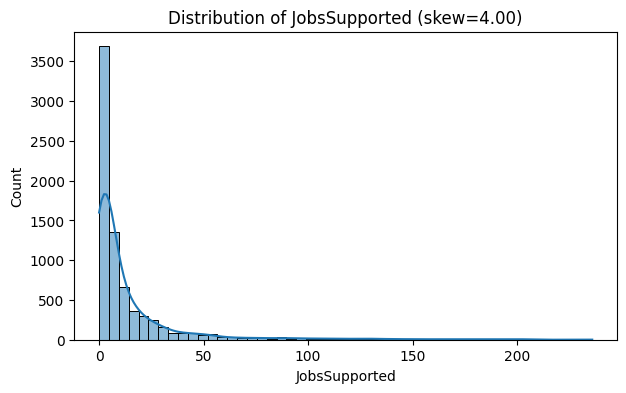

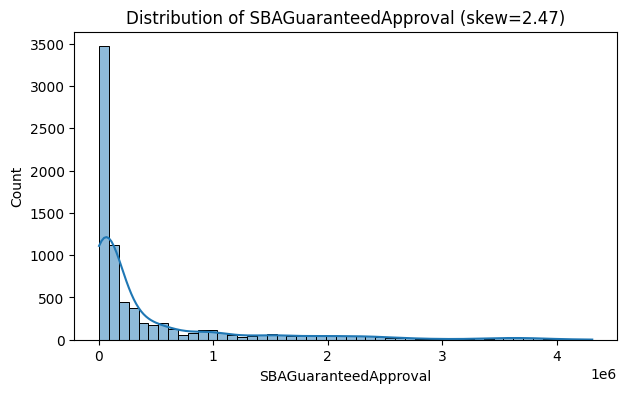

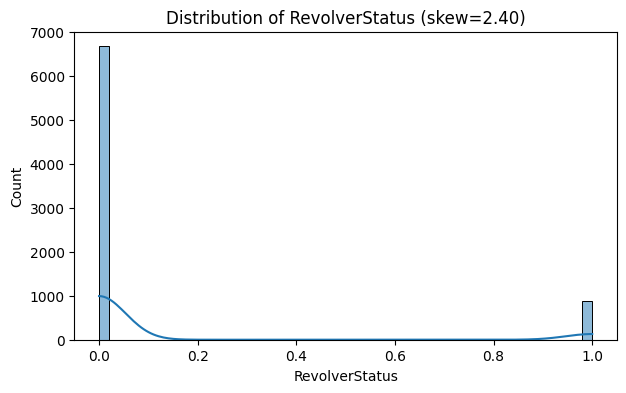

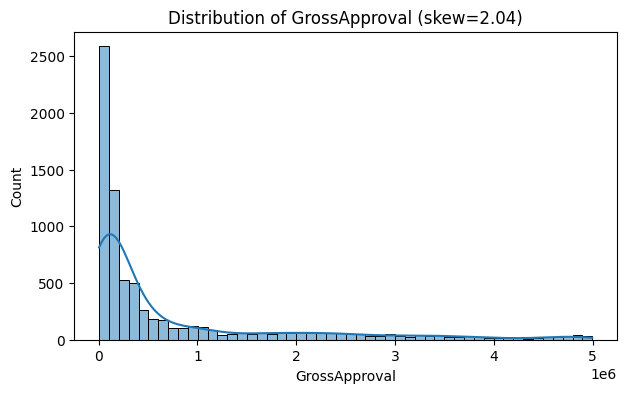

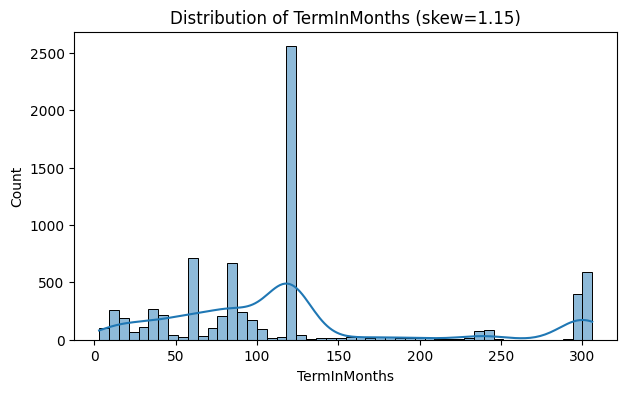

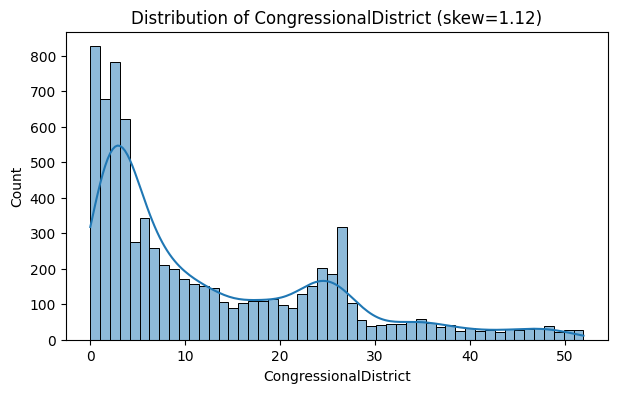

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew

# 数値カラムを抽出（idや目的変数LoanStatusは除外）
numeric_cols = train.select_dtypes(include=[np.number]).columns.drop(['id', 'LoanStatus'])

# 歪度を計算
skewness = {}
for col in numeric_cols:
    val = skew(train[col].dropna())
    skewness[col] = val

# 歪度の大きい順に並べる
skew_df = pd.DataFrame.from_dict(skewness, orient='index', columns=['skewness']).sort_values(by='skewness', ascending=False)
print(skew_df)

# 右に長い（skewness > 1）カラムだけプロット
high_skew_cols = skew_df[skew_df['skewness'] > 1].index

for col in high_skew_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(train[col], bins=50, kde=True)
    plt.title(f"Distribution of {col} (skew={skewness[col]:.2f})")
    plt.show()


地域ごと

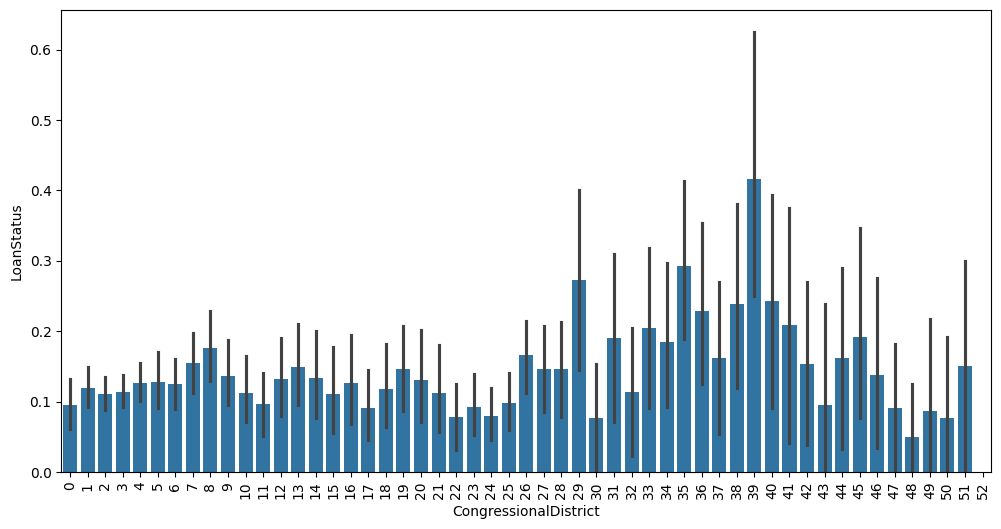

In [ ]:
plt.figure(figsize=(12, 6)) # Increased figure size
sns.barplot(data=train, x='CongressionalDistrict', y='LoanStatus')
plt.xticks(rotation=90)
plt.show()

In [ ]:
train.groupby("CongressionalDistrict")["LoanStatus"].mean().sort_values(ascending=False)

,LoanStatus
CongressionalDistrict,
39,0.416667
35,0.293103
29,0.272727
40,0.242424
38,0.238095
36,0.229167
41,0.208333
33,0.204545
45,0.192308


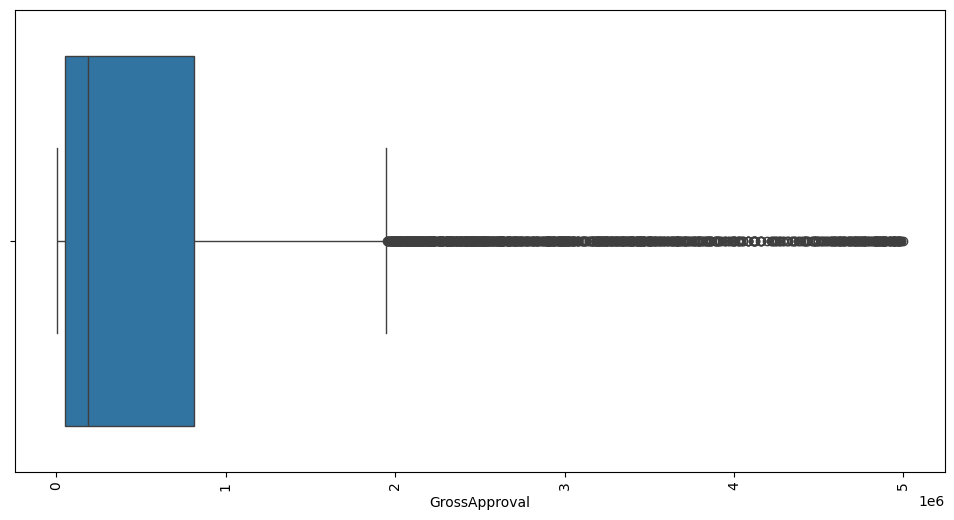

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6)) # Increased figure size
sns.boxplot(data=train, x="GrossApproval")
plt.xticks(rotation=90)
plt.show()


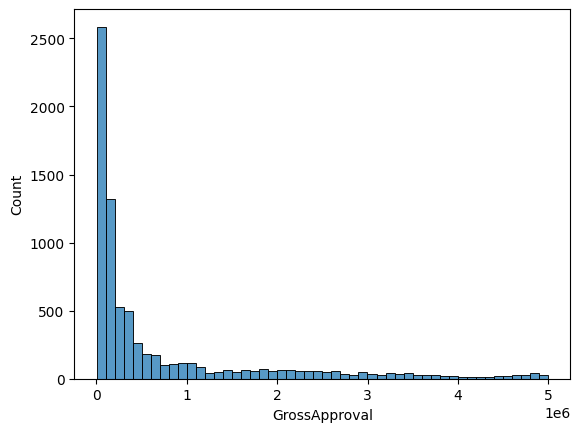

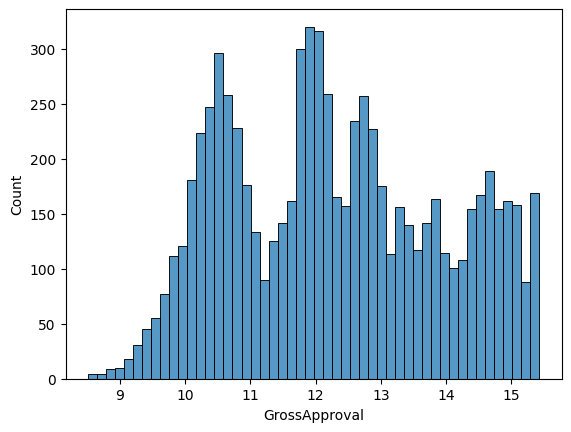

In [ ]:
sns.histplot(train["GrossApproval"], bins=50)
plt.show()

sns.histplot(np.log1p(train["GrossApproval"]), bins=50)
plt.show()


#前処理


train・test・targetに分割

In [ ]:
target = train["LoanStatus"]
train = train.drop(columns=["LoanStatus",'id','RevolverStatus'])
test = test.drop(columns=['id','RevolverStatus'])

In [ ]:
train.head()

,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,Subprogram,InitialInterestRate,FixedOrVariableInterestInd,TermInMonths,NaicsSector,CongressionalDistrict,BusinessType,BusinessAge,JobsSupported,CollateralInd
0,23000,7093,2020,FA$TRK (Small Loan Express),11.92,V,84,Accommodation_food services,27,CORPORATION,Unanswered,1,N
1,104300,83477,2020,FA$TRK (Small Loan Express),8.40,V,102,Retail trade,14,CORPORATION,"Startup, Loan Funds will Open Business",1,N
2,163900,53246,2020,Contract Guaranty,4.32,F,119,Construction,0,CORPORATION,Existing or more than 2 years old,79,Y
3,127400,77516,2021,Guaranty,6.40,F,59,Information,3,CORPORATION,Existing or more than 2 years old,2,N
4,2128900,858942,2020,Guaranty,5.21,V,300,Health care_social assistance,44,CORPORATION,New Business or 2 years or less,5,Y


In [ ]:
test.head()

,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,Subprogram,InitialInterestRate,FixedOrVariableInterestInd,TermInMonths,NaicsSector,CongressionalDistrict,BusinessType,BusinessAge,JobsSupported,CollateralInd
0,22900,10607,2021,FA$TRK (Small Loan Express),4.30,F,5,Arts_entertainment_recreation,24,CORPORATION,Existing or more than 2 years old,10,Y
1,29000,13390,2020,FA$TRK (Small Loan Express),6.97,V,120,Wholesale trade,5,INDIVIDUAL,New Business or 2 years or less,0,Y
2,2913000,1737254,2020,Guaranty,5.61,V,200,Manufacturing,1,CORPORATION,"Startup, Loan Funds will Open Business",96,Y
3,39200,24755,2022,FA$TRK (Small Loan Express),10.00,V,85,Other services (except public administration),11,CORPORATION,Unanswered,12,N
4,13600,5064,2020,FA$TRK (Small Loan Express),7.34,V,39,Other services (except public administration),1,CORPORATION,Existing or more than 2 years old,0,N


##ラベルエンコーディング

・business_age_orderに関してはしっかりとモデルがbusiness ageの期間の長さを大小関係でわかるようにした。

・LightGBMの単体モデルを採用したので、相性の良いラベルエンコーディングを適用した。

In [ ]:
from sklearn.preprocessing import LabelEncoder

list_label = ['Subprogram','FixedOrVariableInterestInd', 'NaicsSector',"BusinessType",'CollateralInd']
encoders = {}

for col in list_label:
    le = LabelEncoder()
    le.fit(pd.concat([train[col], test[col]], axis=0))
    train["label_encoding_" + col] = le.transform(train[col])
    test["label_encoding_" + col] = le.transform(test[col])
    encoders[col] = le  # 必要なら保存

# カテゴリに順序付けされた辞書を作成
business_age_order = {
    'Startup, Loan Funds will Open Business': 0,
    'New Business or 2 years or less': 1,
    'Existing or more than 2 years old': 2,
    'Change of Ownership': 3,  # 特殊なケースとして別扱い
    'Unanswered': -1 # 欠損値として扱う
}

# map()関数を使って変換　これはカテゴリ変数だが、数値として意味があるので
train['BusinessAge_encoded'] = train['BusinessAge'].map(business_age_order)
test['BusinessAge_encoded'] = test['BusinessAge'].map(business_age_order)


# 元のカテゴリ列を削除（LightGBM用）
# BusinessAgeも一緒に削除する
columns_to_drop = list_label + ['BusinessAge']
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)


In [ ]:
# --- ラベルエンコード後（元のカテゴリ列をdropした直後）に追加 ---
categorical_features = [f"label_encoding_{c}" for c in list_label]

# dtypeをcategoryに（安全）
train[categorical_features] = train[categorical_features].astype("category")
test[categorical_features]  = test[categorical_features].astype("category")


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7552 entries, 0 to 7551
Data columns (total 13 columns):
 #   Column                                     Non-Null Count  Dtype   
---  ------                                     --------------  -----   
 0   GrossApproval                              7552 non-null   int64   
 1   SBAGuaranteedApproval                      7552 non-null   int64   
 2   ApprovalFiscalYear                         7552 non-null   int64   
 3   InitialInterestRate                        7552 non-null   float64 
 4   TermInMonths                               7552 non-null   int64   
 5   CongressionalDistrict                      7552 non-null   int64   
 6   JobsSupported                              7552 non-null   int64   
 7   label_encoding_Subprogram                  7552 non-null   category
 8   label_encoding_FixedOrVariableInterestInd  7552 non-null   category
 9   label_encoding_NaicsSector                 7552 non-null   category
 10  label_encodi

In [ ]:
train.head()

,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,CongressionalDistrict,JobsSupported,label_encoding_Subprogram,label_encoding_FixedOrVariableInterestInd,label_encoding_NaicsSector,label_encoding_BusinessType,label_encoding_CollateralInd,BusinessAge_encoded
0,23000,7093,2020,11.92,84,27,1,2,1,0,1,0,-1
1,104300,83477,2020,8.40,102,14,1,2,1,16,1,0,0
2,163900,53246,2020,4.32,119,0,79,1,0,4,1,1,2
3,127400,77516,2021,6.40,59,3,2,3,0,8,1,0,2
4,2128900,858942,2020,5.21,300,44,5,3,1,7,1,1,1


In [ ]:
# データの特徴量の数が一致しているか確認
print(train.shape, test.shape)

(7552, 13) (7552, 13)


In [ ]:
# 学習データとテストデータの特徴量の中で、重複していない特徴量を抽出する
print(set(train.columns) ^ set(test.columns))

set()


In [ ]:
# 削除が反映されているか確認
print(train.shape, test.shape)

(7552, 13) (7552, 13)


##特徴量エンジニアリング

・対数化する

In [ ]:
import numpy as np

log_candidates = ["JobsSupported", "SBAGuaranteedApproval", "GrossApproval", "TermInMonths"]

for col in log_candidates:
    train[f"log_{col}"] = np.log1p(train[col])
    test[f"log_{col}"] = np.log1p(test[col])


・差分特徴量の作成

In [ ]:
# 平均・中央値との差分を作る
gross_mean = train["log_GrossApproval"].mean()
gross_median = train["log_GrossApproval"].median()

train["GrossApproval_log_minusMean"] = train["log_GrossApproval"] - gross_mean
test["GrossApproval_log_minusMean"]  = test["log_GrossApproval"]  - gross_mean

train["GrossApproval_log_minusMedian"] = train["log_GrossApproval"] - gross_median
test["GrossApproval_log_minusMedian"]  = test["log_GrossApproval"]  - gross_median


・SBAGuaranteedApproval / (GrossApproval + 1e-9) = GuaranteeRatio ：ローンなどの承認額のうち、政府機関 (SBA) によって保証されている割合

→そのため、SBA保証承認額 (SBAGuaranteedApproval) を 総承認額 (GrossApproval) で割っている。

In [ ]:
#政府機関 (SBA) によって保証されている割合
train["GuaranteeRatio"] = train["SBAGuaranteedApproval"] / (train["GrossApproval"]+1e-9)
test["GuaranteeRatio"]  = test["SBAGuaranteedApproval"]  / (test["GrossApproval"]+1e-9)

・差分特徴量も作成

In [ ]:
sba_mean = train["log_SBAGuaranteedApproval"].mean()
sba_median = train["log_SBAGuaranteedApproval"].median()

train["SBAGuaranteedApproval_log_minusMean"] = train["log_SBAGuaranteedApproval"] - sba_mean
test["SBAGuaranteedApproval_log_minusMean"]  = test["log_SBAGuaranteedApproval"]  - sba_mean

train["SBAGuaranteedApproval_log_minusMedian"] = train["log_SBAGuaranteedApproval"] - sba_median
test["SBAGuaranteedApproval_log_minusMedian"]  = test["log_SBAGuaranteedApproval"]  - sba_median

・GrossApproval / (JobsSupported + 1e-9) = Loan_amountPeremployee：従業員あたりの融資額

→雇用数が多いほど事業規模が大きいと推測できる。GrossApproval との比率（従業員あたりの融資額）は、事業の健全性を示す特徴量になりうる。


・GrossApproval * InitialInterestRate = initial_repaymentBurden：初期の返済負担

→金利が高いほどデフォルト率が高まる傾向がある。他の変数との組み合わせで初期の返済負担を特徴量として表現できる。



In [ ]:
train["Loan_amountPeremployee"] = (train["GrossApproval"])/ (train['JobsSupported']+1e-9)
test["Loan_amountPeremployee"]  =  (test["GrossApproval"])/ (test['JobsSupported']+1e-9)

train['initial_repaymentBurden'] = (train["GrossApproval"])*(train['InitialInterestRate']/100)
test['initial_repaymentBurden'] = (test["GrossApproval"])*(test['InitialInterestRate']/100)


・repayment_difficulty = TermInMonths * InitialInterestRate: 返済期間と金利の両方で、返済の負担度合いを表現する複合的な特徴量。

・risk_and_cost = GuaranteeRatio * InitialInterestRate: 保証率の高さ（リスクの低さ）と金利（コストの高さ）の関係性を捉える特徴量。

・差分特徴量や比率特徴量も作成

In [ ]:
train['repayment_difficulty'] = train['TermInMonths']*train['InitialInterestRate']
test['repayment_difficulty'] = test['TermInMonths']*test['InitialInterestRate']

train['risk_andCost'] = train['GuaranteeRatio']*train['InitialInterestRate']
test['risk_andCost'] = test['GuaranteeRatio']*test['InitialInterestRate']

# 平均・中央値との差分を作る
risk_andCost_gross_mean = train["risk_andCost"].mean()
risk_andCost_gross_median = train["risk_andCost"].median()

train["risk_andCost_minusMean"] = train["risk_andCost"] - risk_andCost_gross_mean
test["risk_andCost_minusMean"]  = test["risk_andCost"]  - risk_andCost_gross_mean

train["risk_andCost_minusMedian"] = train["risk_andCost"] - risk_andCost_gross_median
test["risk_andCost_minusMedian"]  = test["risk_andCost"]  - risk_andCost_gross_median

train['risk_andCostPerEmployee'] = train['GuaranteeRatio']*train['InitialInterestRate']/train['JobsSupported']
test['risk_andCostPerEmployee'] = test['GuaranteeRatio']*test['InitialInterestRate']/test['JobsSupported']

・SBAGuaranteedApproval / (JobsSupported + 1e-9) = Guarantee_amount_PerEmployee：従業員あたりの保証額

・(GrossApproval × (InitialInterestRate/100)) / TermInMonths = MonthlyRepaymentEstimate：月額返済額の推定

・MonthlyRepaymentEstimate/(Guarantee_amount_PerEmployee+ 1e-9) = Repay_to_GuaranteePerEmp：月額返済見積りのうち従業員あたりの保証額が占める割合

In [ ]:
# --- 特徴量追加 ---

# 従業員あたりの保証額
train["Guarantee_amount_PerEmployee"] = train["SBAGuaranteedApproval"] / (train["JobsSupported"] + 1e-9)
test["Guarantee_amount_PerEmployee"]  = test["SBAGuaranteedApproval"]  / (test["JobsSupported"] + 1e-9)

# 月額返済額の推定
train["MonthlyRepaymentEstimate"] = (train["GrossApproval"] * (train["InitialInterestRate"] / 100)) / (train["TermInMonths"] + 1e-9)
test["MonthlyRepaymentEstimate"]  = (test["GrossApproval"] * (test["InitialInterestRate"] / 100)) / (test["TermInMonths"] + 1e-9)

# 返済負担 ÷ 保証/従業員
train["Repay_to_GuaranteePerEmp"] = train["MonthlyRepaymentEstimate"] / (train["Guarantee_amount_PerEmployee"] + 1e-9)
test["Repay_to_GuaranteePerEmp"]  = test["MonthlyRepaymentEstimate"]  / (test["Guarantee_amount_PerEmployee"] + 1e-9)

・GrossApproval / (BusinessAge_encoded + 1e-9) = GrossApproval_per_BusinessAge：融資額と事業年数の比率

→事業年数あたりの融資額を算出できる。

目的：事業年数に対して融資額が過剰でないかを評価する。事業年数が浅い（BusinessAge_encodedが小さい）のに多額の融資を受けている場合、デフォルトリスクが高い可能性がある。

・TermInMonths/ (BusinessAge_encoded'+ 1e-9) = TermInMonths_per_BusinessAge：融資期間と事業年数の比率

→事業年数に対する融資期間の長さを算出できる。


目的:事業年数が浅いにもかかわらず、返済期間が非常に長いローンは、長期的な返済能力に不安があることを示唆する可能性がある。


・InitialInterestRate * BusinessAge_encoded = Interest_by_age：複合的なリスク指標

→事業の成熟度と金利コストのバランスを表現する。

目的:事業年数が浅い（BusinessAge_encodedが小さい）企業が高金利（InitialInterestRateが高い）で融資を受けている場合、デフォルトリスクが非常に高い状況と見なせる。この特徴量は、その複合的なリスクをモデルに伝える。




In [ ]:
# 1. 事業年数あたりの融資額
# BusinessAge_encodedが0のケースを避けるため、+1e-9を加える
train['GrossApproval_per_BusinessAge'] = train['GrossApproval'] / (train['BusinessAge_encoded'] + 1e-9)
test['GrossApproval_per_BusinessAge'] = test['GrossApproval'] / (test['BusinessAge_encoded'] + 1e-9)

# 平均・中央値との差分を作る（差分特徴量）
grossApproval_per_BusinessAge_mean = train['GrossApproval_per_BusinessAge'].mean()
grossApproval_per_BusinessAge_median = train['GrossApproval_per_BusinessAge'].median()

train["GrossApproval_per_BusinessAge_minusMean"] = train["GrossApproval_per_BusinessAge"] - gross_mean
test["GrossApproval_per_BusinessAge_minusMean"]  = test["GrossApproval_per_BusinessAge"]  - gross_mean

train["GrossApproval_per_BusinessAge_minusMedian"] = train["GrossApproval_per_BusinessAge"] - gross_median
test["GrossApproval_per_BusinessAge_minusMedian"]  = test["GrossApproval_per_BusinessAge"]  - gross_median

# 2. 事業年数に対する融資期間の長さ
train['TermInMonths_per_BusinessAge'] = train['TermInMonths'] / (train['BusinessAge_encoded'] + 1e-9)
test['TermInMonths_per_BusinessAge'] = test['TermInMonths'] / (test['BusinessAge_encoded'] + 1e-9)

# 3. 複合的なリスク指標
train['Interest_by_age'] = train['InitialInterestRate'] * train['BusinessAge_encoded']
test['Interest_by_age'] = test['InitialInterestRate'] * test['BusinessAge_encoded']

・GrossApproval/TermInMonth = monthlyRepayment_capacity：月次元の返済能力

・GrossApproval - SBAGuaranteedApproval / (GrossApproval+1e-9) = borrowingBurden_ratio：借り手負担比率

・InitialInterestRate / log_TermInMonths = ir_div_term：金利負担と返済期間の組み合わせ

・BusinessAge_encoded * TermInMonths = businessAge_Term：年齢×返済期間

In [ ]:
#月次元の返済能力

train['monthlyRepayment_capacity'] = train['GrossApproval'] / train['TermInMonths']
test['monthlyRepayment_capacity'] = test['GrossApproval'] / test['TermInMonths']

#借り手負担比率
train['borrowingBurden_ratio'] = (train['GrossApproval'] - train['SBAGuaranteedApproval'] ) / (train['GrossApproval']+1e-9)
test['borrowingBurden_ratio'] = (test['GrossApproval'] - test['SBAGuaranteedApproval'] ) / (test['GrossApproval']+1e-9)

#金利×log(金額)
# InitialInterestRate * log1p(GrossApproval)
train["ir_x_log_amt"] = train["InitialInterestRate"] * (train['log_GrossApproval'])
test["ir_x_log_amt"]  = test["InitialInterestRate"]  * (test['log_GrossApproval'])

# ===== 2) 金利 / √期間 =====
# InitialInterestRate / log(TermInMonths)
train["ir_div_log_term"] = train["InitialInterestRate"] / (train['log_TermInMonths'])
test["ir_div_log_term"]  = test["InitialInterestRate"]  / (test['log_TermInMonths'] )

# InitialInterestRate / TermInMonths
train["ir_div_term"] = train["InitialInterestRate"] / (train['TermInMonths'])
test["ir_div_term"]  = test["InitialInterestRate"]  / (test['TermInMonths'] )

# BusinessAge × Term（年齢×返済期間）
train['businessAge_Term'] = train['BusinessAge_encoded']*train['TermInMonths']
test['businessAge_Term'] = test['BusinessAge_encoded']*test['TermInMonths']

・Loan_amountPeremployee × GuaranteeRatio = PerEmployee_guaranteeRatio：借入のカバー度合い

→従業員1人あたりの借入が保証率でどの程度カバーされているか

・MonthlyRepaymentEstimate / monthlyRepayment_capacity = NormalizedEstimated_repayment_burden：比率の入れ子

→ 推定返済負担を、単純な月次借入額で正規化


・borrowingBurden_ratio × InitialInterestRate = effective_risk_ratio：実質リスク比

→ 保証負担とコストを掛け合わせた「実質リスク比」

・MonthlyRepaymentEstimate * BusinessAge_encoded = Repay_x_Age：月額返済負担 × 事業年数

In [ ]:
#従業員1人あたりの借入が保証率でどの程度カバーされているか Loan_amountPeremployee × GuaranteeRatio
train['PerEmployee_guaranteeRatio'] = train['Loan_amountPeremployee'] * train['GuaranteeRatio']
test['PerEmployee_guaranteeRatio'] = test['Loan_amountPeremployee'] * test['GuaranteeRatio']

# 推定返済負担を、単純な月次借入額で正規化
train['NormalizedEstimated_repayment_burden'] = train['MonthlyRepaymentEstimate'] / train['monthlyRepayment_capacity']
test['NormalizedEstimated_repayment_burden'] = test['MonthlyRepaymentEstimate'] / test['monthlyRepayment_capacity']

# 保証負担とコストを掛け合わせた「実質リスク比」
train['effective_risk_ratio'] = train['borrowingBurden_ratio']*train['InitialInterestRate']/100
test['effective_risk_ratio'] = test['borrowingBurden_ratio']*test['InitialInterestRate']/100

# ---- 月額返済負担 × 事業年数 ----
train["Repay_x_Age"] = train["MonthlyRepaymentEstimate"] * train["BusinessAge_encoded"]
test["Repay_x_Age"]  = test["MonthlyRepaymentEstimate"]  * test["BusinessAge_encoded"]

train['net_repay_burden'] = train['MonthlyRepaymentEstimate'] * (1 - train['GuaranteeRatio'])
test['net_repay_burden']  = test['MonthlyRepaymentEstimate']  * (1 - test['GuaranteeRatio'])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold

# ==== OOF Target Encoding: CongressionalDistrict の平均デフォルト率（平滑化あり） ====
global_mean = float(target.mean())
m = 20  # 出現回数が少ない地区を全体平均に寄せる強さ（10〜50で調整可）

oof_te = np.full(len(train), global_mean, dtype=float)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for tr_idx, va_idx in skf.split(train, target):
    df_tr = pd.DataFrame({
        "d": train.iloc[tr_idx]["CongressionalDistrict"].values,
        "y": target.iloc[tr_idx].values
    })
    g = df_tr.groupby("d")["y"].agg(["sum", "count"])
    g["smoothed"] = (g["sum"] + m * global_mean) / (g["count"] + m)
    mapping = g["smoothed"]
    oof_te[va_idx] = train.iloc[va_idx]["CongressionalDistrict"].map(mapping).fillna(global_mean).values

train["District_DefaultRate"] = oof_te

# テストには train 全体で学習した mapping を適用
df_full = pd.DataFrame({
    "d": train["CongressionalDistrict"].values,
    "y": target.values
})
g_full = df_full.groupby("d")["y"].agg(["sum", "count"])
g_full["smoothed"] = (g_full["sum"] + m * global_mean) / (g_full["count"] + m)
mapping_full = g_full["smoothed"]

test["District_DefaultRate"] = test["CongressionalDistrict"].map(mapping_full).fillna(global_mean)


EDAからCongressionalDistrictによってLoanStatusが異なり、地域差があることがわかったので、以下の特徴量を作成した。

In [ ]:
# ===== 地区別の平均/中央値/標準偏差 + 件数 =====
district_stats = (
    train.groupby("CongressionalDistrict").agg(
        GrossApproval_mean_perDistrict=("GrossApproval", "mean"),
        GrossApproval_median_perDistrict=("GrossApproval", "median"),
        GrossApproval_std_perDistrict=("GrossApproval", "std"),
        InitialInterestRate_mean_perDistrict=("InitialInterestRate", "mean"),
        InitialInterestRate_median_perDistrict=("InitialInterestRate", "median"),
        InitialInterestRate_std_perDistrict=("InitialInterestRate", "std"),
        BusinessAge_encoded_mean_perDistrict=("BusinessAge_encoded", "mean"),
        BusinessAge_encoded_median_perDistrict=("BusinessAge_encoded", "median"),
        BusinessAge_encoded_std_perDistrict=("BusinessAge_encoded", "std"),
        count_perDistrict=("CongressionalDistrict", "size"),
    )
).reset_index()

# マージ（copy無し）
train = train.merge(district_stats, on="CongressionalDistrict", how="left")
test  = test.merge(district_stats,  on="CongressionalDistrict", how="left")

# 自分値との相対・差分特徴（代表例）
eps = 1e-9
train["Gross_toDistrictMean"] = train["GrossApproval"] / (train["GrossApproval_mean_perDistrict"] + eps)
test["Gross_toDistrictMean"]  = test["GrossApproval"]  / (test["GrossApproval_mean_perDistrict"]  + eps)

train["Gross_minusDistrictMedian"] = train["GrossApproval"] - train["GrossApproval_median_perDistrict"]
test["Gross_minusDistrictMedian"]  = test["GrossApproval"]  - test["GrossApproval_median_perDistrict"]

train["IR_toDistrictMean"] = train["InitialInterestRate"] / (train["InitialInterestRate_mean_perDistrict"] + eps)
test["IR_toDistrictMean"]  = test["InitialInterestRate"]  / (test["InitialInterestRate_mean_perDistrict"]  + eps)

train["IR_minusDistrictMedian"] = train["InitialInterestRate"] - train["InitialInterestRate_median_perDistrict"]
test["IR_minusDistrictMedian"]  = test["InitialInterestRate"]  - test["InitialInterestRate_median_perDistrict"]

train["AgeEnc_toDistrictMean"] = train["BusinessAge_encoded"] / (train["BusinessAge_encoded_mean_perDistrict"] + eps)
test["AgeEnc_toDistrictMean"]  = test["BusinessAge_encoded"]  / (test["BusinessAge_encoded_mean_perDistrict"]  + eps)


特徴量重要度をみて、dropするものを決定

In [ ]:
train = train.drop(columns=["log_GrossApproval",'GrossApproval_log_minusMedian','SBAGuaranteedApproval_log_minusMedian','log_JobsSupported','BusinessAge_encoded_median_perDistrict','BusinessAge_encoded','GrossApproval_per_BusinessAge_minusMedian', 'PerEmployee_guaranteeRatio','log_SBAGuaranteedApproval'])
test = test.drop(columns=['log_GrossApproval','GrossApproval_log_minusMedian','SBAGuaranteedApproval_log_minusMedian','log_JobsSupported','BusinessAge_encoded_median_perDistrict','BusinessAge_encoded','GrossApproval_per_BusinessAge_minusMedian', 'PerEmployee_guaranteeRatio','log_SBAGuaranteedApproval'])

In [ ]:
# データの特徴量の数が一致しているか確認
print(train.shape, test.shape)

(7552, 55) (7552, 55)


In [ ]:
# 学習データとテストデータの特徴量の中で、重複していない特徴量を抽出する
print(set(train.columns) ^ set(test.columns))

set()


In [ ]:
train.head()

,GrossApproval,SBAGuaranteedApproval,ApprovalFiscalYear,InitialInterestRate,TermInMonths,CongressionalDistrict,JobsSupported,label_encoding_Subprogram,label_encoding_FixedOrVariableInterestInd,label_encoding_NaicsSector,...,InitialInterestRate_median_perDistrict,InitialInterestRate_std_perDistrict,BusinessAge_encoded_mean_perDistrict,BusinessAge_encoded_std_perDistrict,count_perDistrict,Gross_toDistrictMean,Gross_minusDistrictMedian,IR_toDistrictMean,IR_minusDistrictMedian,AgeEnc_toDistrictMean
0,23000,7093,2020,11.92,84,27,1,2,1,0,...,7.18,3.065730,1.238462,1.047728,130,0.029558,-115550.0,1.520110,4.74,-0.807453
1,104300,83477,2020,8.40,102,14,1,2,1,16,...,7.03,2.964146,1.314286,0.880497,105,0.192281,-95200.0,1.115002,1.37,0.000000
2,163900,53246,2020,4.32,119,0,79,1,0,4,...,5.97,2.744667,1.320946,0.971649,296,0.305332,29000.0,0.631442,-1.65,1.514066
3,127400,77516,2021,6.40,59,3,2,3,0,8,...,6.53,2.856367,1.199234,1.029563,783,0.194505,-125600.0,0.866667,-0.13,1.667732
4,2128900,858942,2020,5.21,300,44,5,3,1,7,...,9.13,3.129076,1.612903,0.760588,31,3.948706,1976800.0,0.615065,-3.92,0.620000


# 学習・検証・予測

In [ ]:
# scikit-learnからtrain_test_splitをインポートします。
from sklearn.model_selection import StratifiedKFold

In [ ]:
# 実行時間計測のために利用します
import time

# lightgbmをインポートします
import lightgbm as lgb

# scikit-learnからStratifiedKFoldをインポートします。
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, confusion_matrix

不均衡データであるのでclass_weight：balancedを採用

In [ ]:
params = {
    'objective':'binary',
    'metric':'logloss',
    'n_estimators': 10000,
    'learning_rate': 0.03,
    'num_leaves': 63,
    'min_data_in_leaf': 50,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 1,
    'lambda_l1': 0.0,
    'lambda_l2': 2.0,
    'random_state': 42,
    'class_weight': 'balanced',
}
# callbacks=[lgb.early_stopping(400), lgb.log_evaluation(100)]


# 学習・予測

In [ ]:
# Fold数を5に設定
NFOLDS = 5
# 分類の閾値を0.5に設定
threshold = 0.5

folds = StratifiedKFold(n_splits=NFOLDS, random_state=777, shuffle=True)

# 検証データ全体での評価結果の取得のために0の配列を作成します。
y_oof = np.zeros(train.shape[0])
# fold分予測を行うので、そのための配列を作成します。
y_test_pred = np.zeros((len(test), NFOLDS))

# 特徴重要度を格納するためのデータフレームを作成します
feature_importance = pd.DataFrame()
feature_importance['feature'] = train.columns

start = time.time()
y_oof = np.zeros(train.shape[0])
splits = folds.split(train, target.round())

for fold_n, (train_index, valid_index) in enumerate(splits):
    fold_start = time.time()

    # モデルの学習と検証
    model = lgb.LGBMClassifier(**params)
    model.fit(
    train.loc[train_index], target[train_index],
    eval_set=[(train.loc[valid_index], target[valid_index])],
    eval_metric='binary_logloss',
    categorical_feature=categorical_features,
    callbacks=[lgb.early_stopping(400), lgb.log_evaluation(100)]
)

    va_pred = model.predict_proba(train.loc[valid_index])[:,1]

    # 特徴重要度の格
    feature_importance[f'fold_{fold_n + 1}'] = model.feature_importances_

    # スコアの算出
    va_target = target[valid_index]
    score = f1_score(va_target, (va_pred >= threshold).astype(int))
    print(f"Fold {fold_n + 1} | F1: {score}")

    y_oof[valid_index] = va_pred

    # ここでテストデータの予測をする
    y_test_pred[:, fold_n] = model.predict_proba(test)[:,1]

    print("{:2.0f}分{:2.0f}秒".format((time.time()-fold_start)//60,(time.time()-fold_start)%60))
    print()

# 全体の予測時間とスコアを算出する
print("全体の合計")
print("{:2.0f}分{:2.0f}秒".format((time.time()-start)//60,(time.time()-start)%60))

score = f1_score(target, (y_oof >= threshold).astype(int))
print(f"\nOut of folds F1 = {score}")

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] lambda_l2 is set=2.0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0
[LightGBM] [Warning] lambda_l1 is set=0.0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Curr

F1スコアの最適化

In [ ]:
from sklearn.metrics import precision_recall_curve
import numpy as np

prec, rec, thr = precision_recall_curve(target, y_oof)
f1s = 2*prec*rec/(prec+rec+1e-9)
best_thr = thr[np.nanargmax(f1s)]
print("Best threshold:", best_thr)

# 最適閾値でスコア計算
score = f1_score(target, (y_oof >= best_thr).astype(int))
print(f"OOF F1 with best threshold = {score}")


Best threshold: 0.41253141664340154
OOF F1 with best threshold = 0.6294964028776978


特徴量重要度

=== 上位10特徴量 ===
                          feature  average
4                    TermInMonths   1214.4
40           District_DefaultRate    897.0
28   TermInMonths_per_BusinessAge    823.2
37           effective_risk_ratio    712.4
16         Loan_amountPeremployee    655.2
34                    ir_div_term    651.6
25       Repay_to_GuaranteePerEmp    643.0
18           repayment_difficulty    638.0
26  GrossApproval_per_BusinessAge    631.0
32                   ir_x_log_amt    613.4

=== 下位10特徴量 ===
                                      feature  average
0                               GrossApproval    244.8
15        SBAGuaranteedApproval_log_minusMean    223.8
36       NormalizedEstimated_repayment_burden    194.4
7                   label_encoding_Subprogram    178.8
13                GrossApproval_log_minusMean    147.2
8   label_encoding_FixedOrVariableInterestInd    139.0
10                label_encoding_BusinessType    134.8
27    GrossApproval_per_BusinessAge_minusMean    130.6

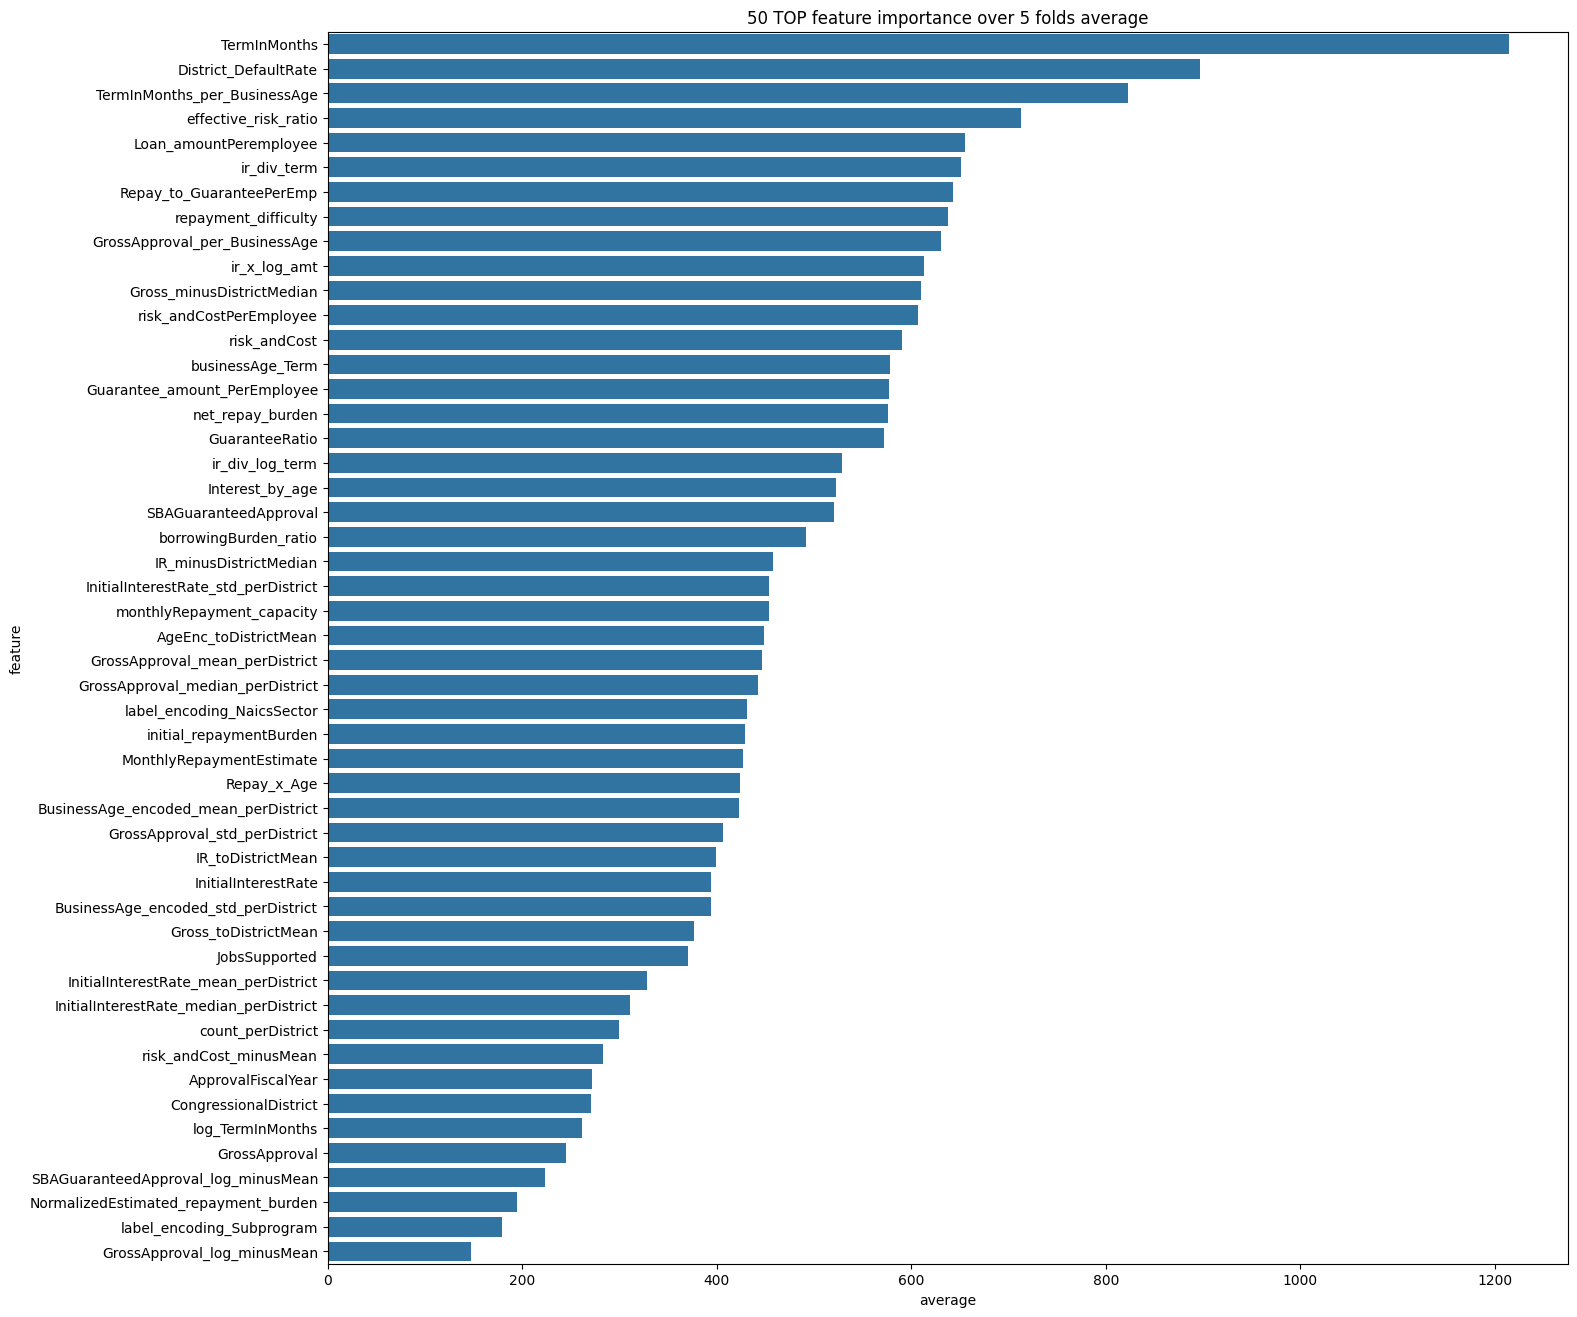

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 平均重要度を計算
feature_importance['average'] = feature_importance[
    [f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]
].mean(axis=1)

# ソートして上位・下位の値を確認
sorted_fi = feature_importance.sort_values(by='average', ascending=False)

# 上位10個と下位10個を表示
print("=== 上位10特徴量 ===")
print(sorted_fi[['feature', 'average']].head(10))
print("\n=== 下位10特徴量 ===")
print(sorted_fi[['feature', 'average']].tail(10))

# importanceの分布をざっくり確認
print("\n重要度の統計量:")
print(sorted_fi['average'].describe())

# 可視化（上位50特徴量）
plt.figure(figsize=(16, 16))
sns.barplot(
    data=sorted_fi.head(50),
    x='average',
    y='feature'
)
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits))
plt.show()


目的変数との相関

In [ ]:
df_corr = train.copy()
df_corr["target"] = target   # 目的変数を追加
corr = df_corr.corr()
corr["target"].sort_values(ascending=False).head(60)


,target
target,1.000000
ir_div_log_term,0.128344
InitialInterestRate,0.107923
NormalizedEstimated_repayment_burden,0.107923
IR_toDistrictMean,0.106262
IR_minusDistrictMedian,0.103992
risk_andCost,0.086243
risk_andCost_minusMean,0.086243
risk_andCost_minusMedian,0.086243
ir_x_log_amt,0.079104


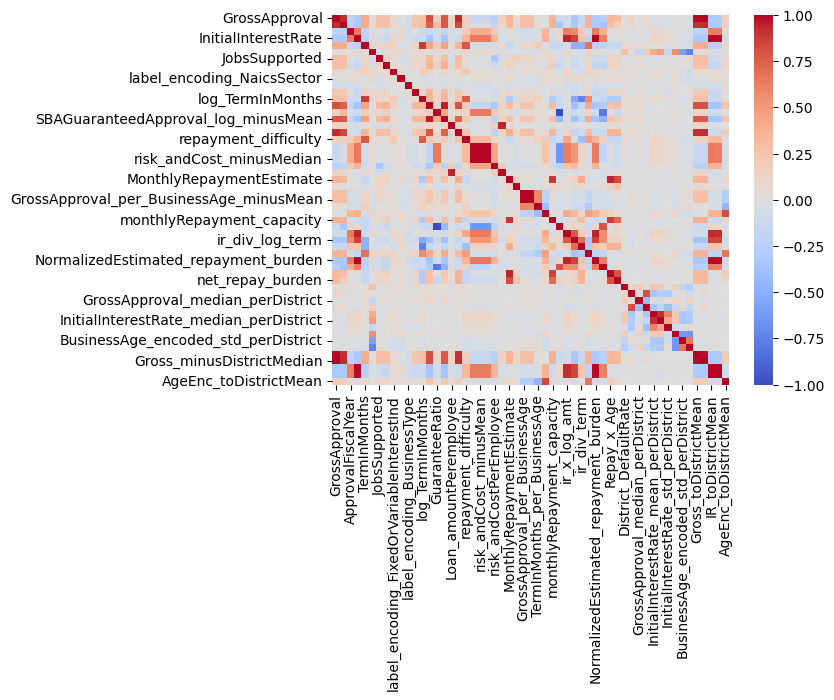

In [ ]:
corr = train.corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.show()


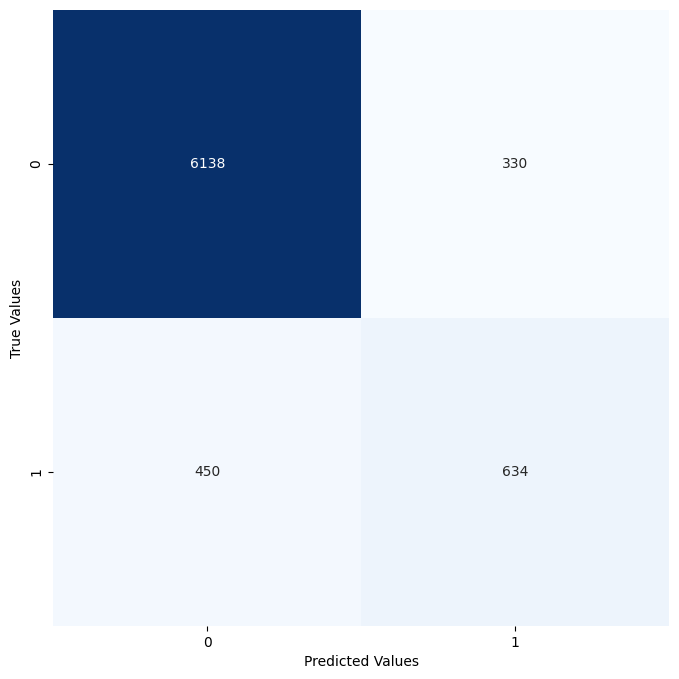

In [ ]:
plt.figure(figsize=(8,8))
mat = confusion_matrix(target, (y_oof >= threshold).astype(int)) # Confusion matrix
# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt="d")
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

In [ ]:
# 学習データ全体の1の割合
print(target.mean())

0.12764830508474576


In [ ]:
# 予測結果の1の割合
print((y_oof >= threshold).astype(int).mean())

0.14353813559322035


# 7. 提出
それでは最後に学習したモデルをテストデータに適用して予測をし提出を行います。

testデータを`model.predict()`で予測し、提出ファイルを作成しましょう!

In [ ]:
predict = y_test_pred.mean(axis=1)

In [ ]:
print(predict[:5])

[0.04459942 0.00139142 0.01179982 0.0708147  0.43909608]


それでは提出ファイルを作成します。

提出ファイルの見本はsubmit_sample.csvにあります。

In [ ]:
#submit_sample.csvを読み込みます。
submit = pd.read_csv("sample_submit.csv", header=None)
submit.head()

,0,1
0,7553,0
1,7554,0
2,7555,0
3,7556,0
4,7557,0


In [ ]:
print(submit.shape)

(7552, 2)


In [ ]:
print(submit[1].mean())

0.1473781779661017


0にid、1にLoanStatusの予測ラベルを入力する場所があります。

submit_sampleのidはテストデータのidの数値と同じため、1の列の部分をモデルで予測した値に変更すると提出できます。

In [ ]:
# また予測値は0か1限定で、データ型をintにする必要があります
submit[1] = (predict >= best_thr).astype(int)

In [ ]:
# 確認してみましょう
submit.head()

,0,1
0,7553,0
1,7554,0
2,7555,0
3,7556,0
4,7557,1


In [ ]:
# 1の予測が見えなかったので、平均値で確認します
print(submit[1].mean())

0.17717161016949154


割合を見るに1の部分が予測データに変わっていることが確認できました!

ではこのデータをcsv形式で保存し提出しましょう!

`to_csv()`でデータをcsvに保存することができます!

In [ ]:
# submission.csvでデータを保存(提出様式はindex=False, header=Noneとなります。)
#submit.to_csv("submission.csv", index=False, header=None)

参考になった記事と書籍

・https://qiita.com/masayuki-sera/items/8c330887f957642a3915

・Kaggleで勝つデータ分析の技術